In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

from PIL import Image

In [2]:
# Open the image and show it in RGB mode

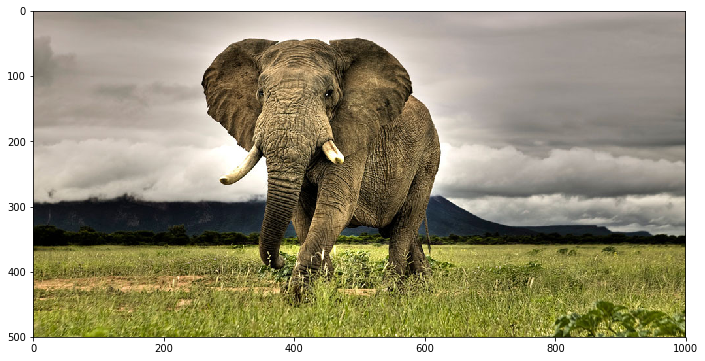

In [3]:
img = Image.open('test_image.jpg')

imggray = img.convert()
plt.figure(figsize=(12, 6))
plt.imshow(imggray)

In [4]:
# Convert image to the RGB numpy matrix

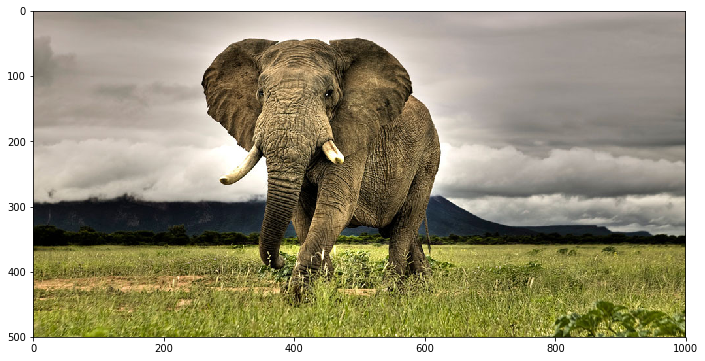

In [5]:
coloredImg = np.array(img)

plt.figure(figsize=(12,6))
plt.imshow(coloredImg);

In [6]:
# Split the RGB matrix to 3 channels(3 matrices)

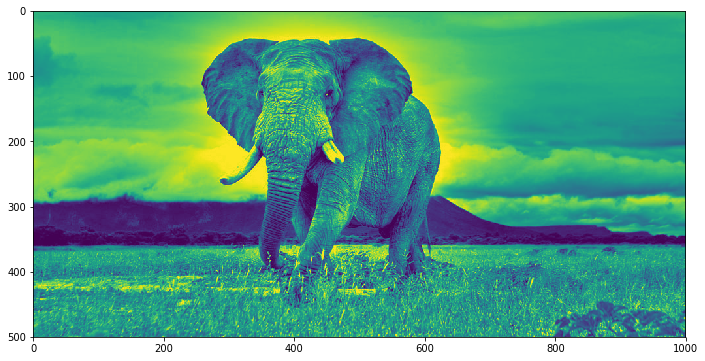

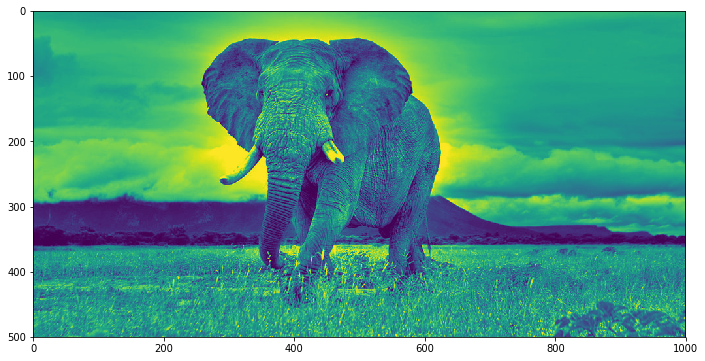

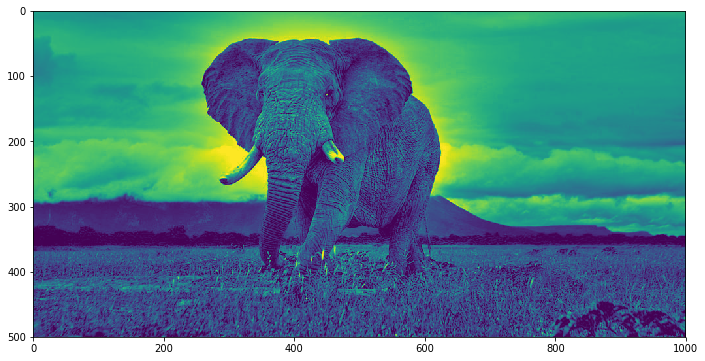

In [7]:
R = coloredImg[:, :, 0].copy()
G = coloredImg[:, :, 1].copy()
B = coloredImg[:, :, 2].copy()


plt.figure(figsize=(12,6))
plt.imshow(R);

plt.figure(figsize=(12,6))
plt.imshow(G);

plt.figure(figsize=(12,6))
plt.imshow(B);

In [8]:
# Turn SVD for each layer

import svd_algo.svd as svd
import svd_algo.ssvd as ssvd

layers = [R, G, B]
decopmosed_layers = []

for layer in layers:
    layer_X = ssvd.svd_shuffle(np.array(layer, dtype='float64'), block_size=16)
    U, sigma, V = svd.svd(layer_X)
    V = V.T
    
    decopmosed_layers.append([U, sigma, V])

/home/andrew/ImageCompression/svd_algo/svd.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  sigma[i, i] = evalues[i] ** 0.5


In [9]:
# Apply approximation for each compressed_layer

In [10]:
compressed_layers = []
rank = 30

for dcl in decopmosed_layers:
    U, sigma, V = dcl
    
    a = np.matrix(U[:, :rank])
    b = sigma[:rank]
    b = b[:rank, :rank]
    c = np.matrix(V[:rank, :])
        
    sl = np.matrix(a * b * c, dtype='float64')
    l = ssvd.svd_unshuffle(sl, layers[0].shape, 16)
    
    compressed_layers.append(l)

In [11]:
# Combine all 3 layers into 1 matrix and show the image

In [12]:
n, m = compressed_layers[0].shape
compressedImage = np.zeros((n, m, 3), 'uint8')

compressedImage[:, :, 0] = compressed_layers[0]
compressedImage[:, :, 1] = compressed_layers[1]
compressedImage[:, :, 2] = compressed_layers[2]

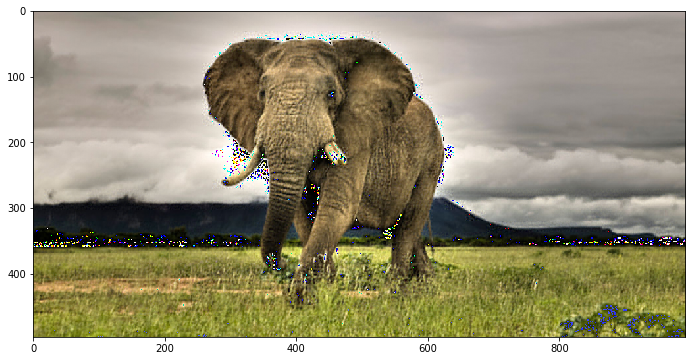

In [13]:
plt.figure(figsize=(12,6))
plt.imshow(compressedImage);

# Do the same, but using functionality of svd_algo library

/home/andrew/ImageCompression/svd_algo/svd.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  sigma[i, i] = evalues[i] ** 0.5


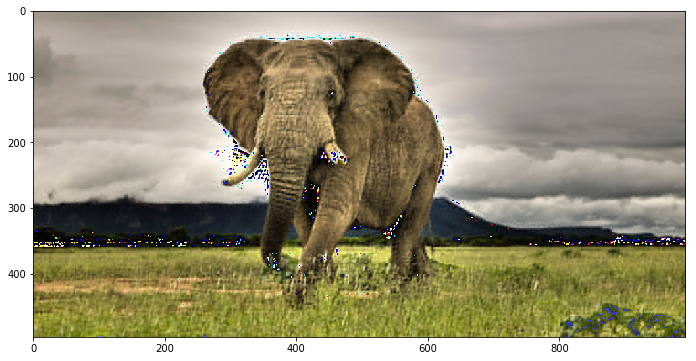

In [14]:
import svd_algo.compress_image as ci
compressedImage = ci.compress_image(coloredImg, mode='rgb', block_size=16, rank=30)

plt.figure(figsize=(12,6))
plt.imshow(compressedImage);